# Exploratory Data Analysis

In [1]:
!pip install seaborn

In [2]:

import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def fileCounter(directory: str):
    lst = os.listdir(directory)
    fileCount = len(lst)
    
    return fileCount

In [4]:
trainingPizzaPath = 'pizza-notpizza/train/pizza'
trainingNotPizzaPath = 'pizza-notpizza/train/not_pizza'

validationPizzaPath = 'pizza-notpizza/val/pizza'
validationNotPizzaPath = 'pizza-notpizza/val/not_pizza'

testingPizzaPath = 'pizza-notpizza/test/pizza'
testingNotPizzaPath = 'pizza-notpizza/test/not_pizza'

In [5]:
trainPizzaCount = fileCounter(trainingPizzaPath)
trainNotPizzaCount = fileCounter(trainingNotPizzaPath)

training = [trainPizzaCount, trainNotPizzaCount]
training

[787, 786]

In [6]:
valPizzaCount = fileCounter(validationPizzaPath)
valNotPizzaCount = fileCounter(validationNotPizzaPath)

validation = [valPizzaCount, valNotPizzaCount]
validation

[98, 98]

In [7]:
testPizzaCount = fileCounter(testingPizzaPath)
testNotPizzaCount = fileCounter(testingNotPizzaPath)

testing = [testPizzaCount, testNotPizzaCount]
testing

[99, 99]

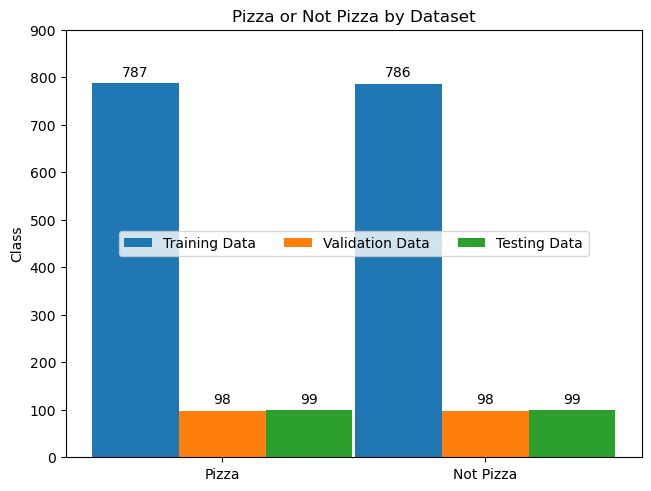

In [8]:
classes = ['Pizza', 'Not Pizza']
classesCount = {
    'Training Data': training,
    'Validation Data': validation,
    'Testing Data': testing
}

x = np.arange(len(classes))
width = 0.33
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for dataset, eachClassCount in classesCount.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, eachClassCount, width, label = dataset)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('Quantity')
ax.set_ylabel('Class')
ax.set_title('Pizza or Not Pizza by Dataset')
ax.set_xticks(x + width, classes)
ax.legend(loc = 'center', ncols = 3)
ax.set_ylim(0, 900)

plt.show()

# First attepmt to train
- Lasso Regularization
- CNN Network
- 3 x 256 x 256 input size

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as F
from torchvision.transforms import v2

import torchmetrics as metrics

from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please

In [10]:
trainData = 'pizza-notpizza/train'
valData = 'pizza-notpizza/val'
testData = 'pizza-notpizza/test'

In [11]:
trainTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

valTestTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

trainDataset = datasets.ImageFolder(trainData, transform=trainTransforms)
valDataset = datasets.ImageFolder(valData, transform=valTestTransforms)
testDataset = datasets.ImageFolder(testData, transform=valTestTransforms)

In [12]:
class_to_idx = trainDataset.class_to_idx

for label, value in class_to_idx.items():
    print(f'Class Name: {label}, Numeric Value: {value}')

Class Name: not_pizza, Numeric Value: 0
Class Name: pizza, Numeric Value: 1


In [13]:
trainDataset[3]

(tensor([[[-0.9922, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9373, -0.9373, -0.9294,  ..., -0.9843, -0.9843, -0.9922],
          ...,
          [-0.7176, -0.7020, -0.7098,  ..., -0.9843, -0.9843, -0.9843],
          [-0.9608, -0.9686, -0.9608,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922, -0.9843,  ..., -0.9922, -0.9922, -0.9922]],
 
         [[-0.9922, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
          [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9765, -0.9686, -0.9686,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-0.8275, -0.8196, -0.8196,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -1.0000, -0.9922,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9843, -0.9922, -0.9765,  ..., -0.9922, -0.9922, -0.9922]],
 
         [[-0.9765, -0.9765, -0.9765,  ..., -0.9922, -0.9922, -0.9922],
          [-0.9922, -0.9922,

In [14]:
BATCH_SIZE = 16
NUM_WORKERS = 4
LEARNING_RATE = 0.0025
WEIGHT_DECAY = 1e-5

In [15]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
valLoader = torch.utils.data.DataLoader(valDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testLoader = torch.utils.data.DataLoader(testDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [15]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(128 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 2)
        
        self.dropout = nn.Dropout(0.6)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
    def forward(self, x):
        x = self.pool(nn.functional.leaky_relu(self.conv1(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv2(x)))
        x = self.pool(nn.functional.leaky_relu(self.conv3(x)))
        
        x = x.view(x.size(0), -1)
        
        x = nn.functional.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

In [16]:
model = CNN()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []
trainAccHistory = []

for epoch in range(50):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print(f'[{epoch + 1}, {i + 1} Loss: {running_loss / 1000}]')
            running_loss = 0.0
            
    epoch_loss = running_loss / len(trainLoader)
    epoch_acc = 100 * correct / total
    trainLossHistory.append(epoch_loss)
    trainAccHistory.append(epoch_acc)
    
    print(f'=== EPOCH [{epoch + 1}]===\n    Loss: {epoch_loss} Accuracy: {epoch_acc}')
    
print('FINISHED TRAINING!')

=== EPOCH [1]===
    Loss: 0.7861540185080634 Accuracy: 52.86259541984733
=== EPOCH [2]===
    Loss: 0.6820587557975692 Accuracy: 59.79643765903308
=== EPOCH [3]===
    Loss: 0.6685600927983871 Accuracy: 62.340966921119595
=== EPOCH [4]===
    Loss: 0.6591628804953411 Accuracy: 63.295165394402034
=== EPOCH [5]===
    Loss: 0.6442307333151499 Accuracy: 66.2849872773537
=== EPOCH [6]===
    Loss: 0.6342445319951183 Accuracy: 67.74809160305344
=== EPOCH [7]===
    Loss: 0.645527414300225 Accuracy: 66.15776081424936
=== EPOCH [8]===
    Loss: 0.6658928183594135 Accuracy: 67.74809160305344
=== EPOCH [9]===
    Loss: 0.6692527764373355 Accuracy: 63.74045801526717
=== EPOCH [10]===
    Loss: 0.6518456526476928 Accuracy: 65.96692111959288
=== EPOCH [11]===
    Loss: 0.6311845403126995 Accuracy: 67.49363867684478
=== EPOCH [12]===
    Loss: 0.6287412309285366 Accuracy: 67.30279898218829
=== EPOCH [13]===
    Loss: 0.6375436268069528 Accuracy: 68.38422391857506
=== EPOCH [14]===
    Loss: 0.5713

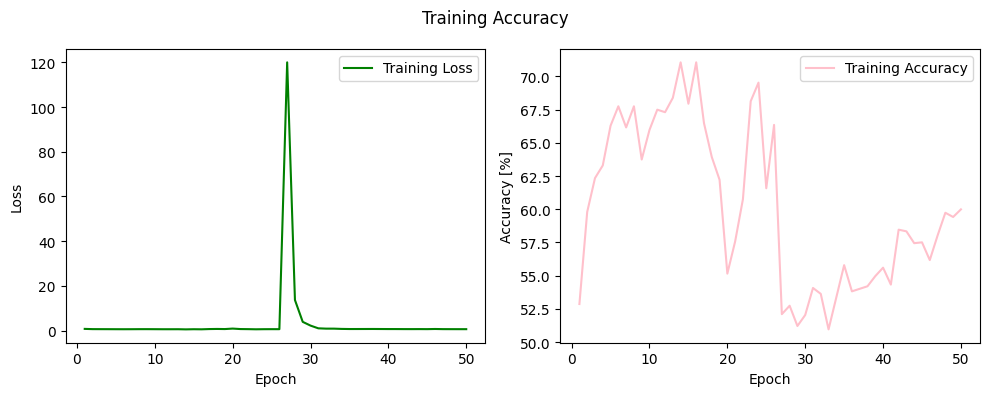

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(trainLossHistory) + 1), trainLossHistory, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainAccHistory) + 1), trainAccHistory, color='pink', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')
plt.suptitle('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [19]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in valLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 46 %


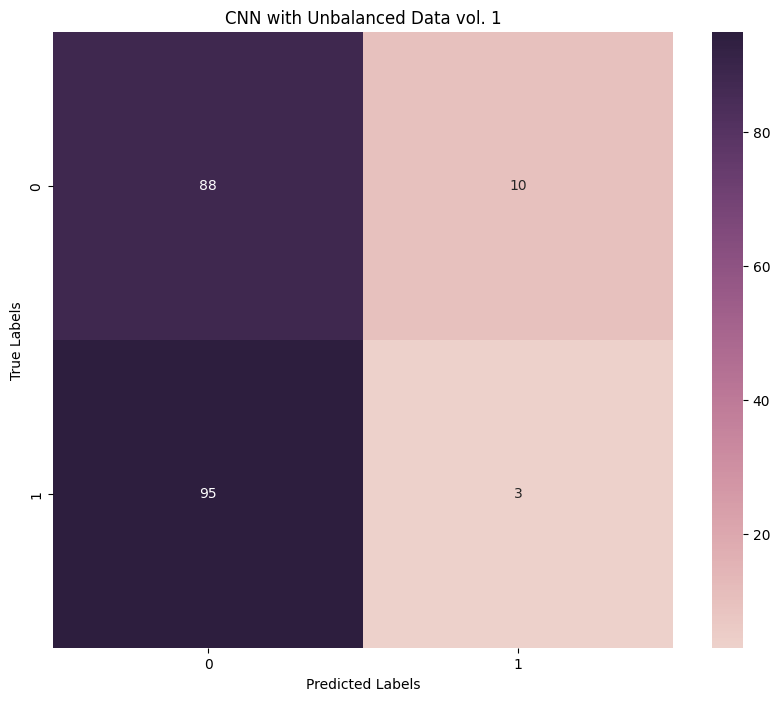

In [22]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN with Unbalanced Data vol. 1')
plt.savefig('conf_matrix_cnn1.png')

plt.show()

In [23]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.90      0.63        98
           1       0.23      0.03      0.05        98

    accuracy                           0.46       196
   macro avg       0.36      0.46      0.34       196
weighted avg       0.36      0.46      0.34       196



In [25]:
f1 = metrics.classification.BinaryF1Score()
f1_score = f1(torch.tensor(predicted_labels), torch.tensor(true_labels))
prec = metrics.classification.BinaryPrecision()
precision = prec(torch.tensor(predicted_labels), torch.tensor(true_labels))
rec = metrics.classification.BinaryRecall()
recall = rec(torch.tensor(predicted_labels), torch.tensor(true_labels))

print(f'F1-Score: {f1_score * 100}, Precision: {precision * 100}, Recall: {recall * 100}')

F1-Score: 5.405405521392822, Precision: 23.076923370361328, Recall: 3.0612244606018066


## EfficientNet + Data Augmentation
Data Augmentations:
- Flips (Horizontal and Vertical)
- Rotation
- Color Gitter

Additionaly:
- Normalization

In [16]:
from torchvision.models import efficientnet_b0

In [ ]:
trainTransforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.3, contrast=0.5, saturation=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

trainDataset = datasets.ImageFolder(trainData, transform=trainTransforms)

In [ ]:
trainLoader = torch.utils.data.DataLoader(trainDataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)

In [19]:
class EfficientNet(nn.Module):
    def __init__(self):
        super(EfficientNet, self).__init__()
        self.model = efficientnet_b0(pretrained = True)
        self.model.classifier = nn.Sequential(
            nn.Dropout(p=0.2, inplace=True),
            nn.Linear(self.model.classifier[1].in_features, 1)  # Adjusted for binary classification
        )
        self.leaky_relu = nn.LeakyReLU()
        
    def forward(self, x):
        x = self.model(x)
        x = self.leaky_relu(x)
        
        return x

In [20]:
model = EfficientNet()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

trainLossHistory = []
trainAccHistory = []

for epoch in range(50):
    model.train()
    correct = 0
    total = 0
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        labels = torch.tensor(labels, dtype=torch.float32)
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print(f'[{epoch + 1}, {i + 1} Loss: {running_loss / 1000}]')
            running_loss = 0.0
            
    epoch_loss = running_loss / len(trainLoader)
    epoch_acc = 100 * correct / total
    trainLossHistory.append(epoch_loss)
    trainAccHistory.append(epoch_acc)
    
    print(f'=== EPOCH [{epoch + 1}]===\n    Loss: {epoch_loss} Accuracy: {epoch_acc}')
    
print('FINISHED TRAINING!')

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /home/studio-lab-user/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 165MB/s]
/tmp/ipykernel_90/3683477769.py:20: UserWarning: To copy construct from 

=== EPOCH [1]===
    Loss: 0.6494204528404005 Accuracy: 798.7921169739352
=== EPOCH [2]===
    Loss: 0.5887183318234454 Accuracy: 798.7921169739352
=== EPOCH [3]===
    Loss: 0.540793220202128 Accuracy: 796.694214876033
=== EPOCH [4]===
    Loss: 0.5348803304662608 Accuracy: 798.0928162746344
=== EPOCH [5]===
    Loss: 0.5219955040950968 Accuracy: 797.3935155753337
=== EPOCH [6]===
    Loss: 0.5133097271124522 Accuracy: 796.694214876033
=== EPOCH [7]===
    Loss: 0.4978678494390815 Accuracy: 798.0928162746344
=== EPOCH [8]===
    Loss: 0.4693356183442203 Accuracy: 797.3935155753337
=== EPOCH [9]===
    Loss: 0.4511308561671864 Accuracy: 796.694214876033
=== EPOCH [10]===
    Loss: 0.4827253993111427 Accuracy: 797.3935155753337
=== EPOCH [11]===
    Loss: 0.5650290539770415 Accuracy: 796.694214876033
=== EPOCH [12]===
    Loss: 0.5350193125430984 Accuracy: 797.3935155753337
=== EPOCH [13]===
    Loss: 0.4624859756893582 Accuracy: 798.0928162746344
=== EPOCH [14]===
    Loss: 0.429657495

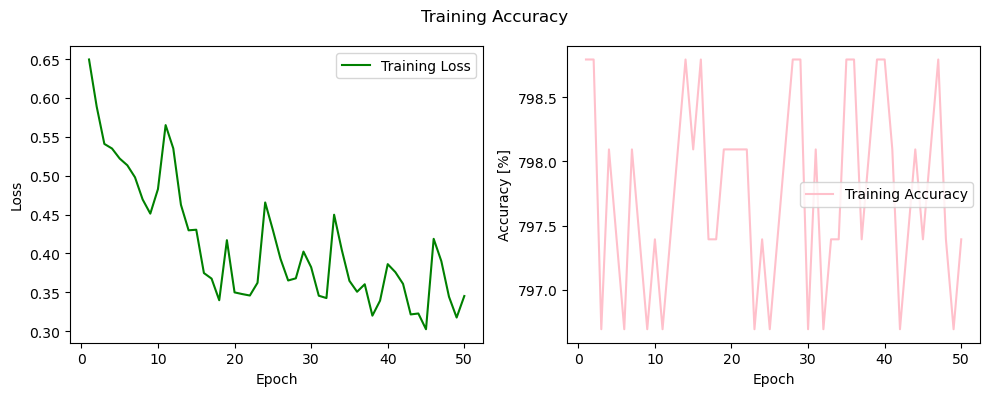

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1, len(trainLossHistory) + 1), trainLossHistory, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(trainAccHistory) + 1), trainAccHistory, color='pink', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy [%]')
plt.suptitle('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
model.eval()
correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in valLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 50 %


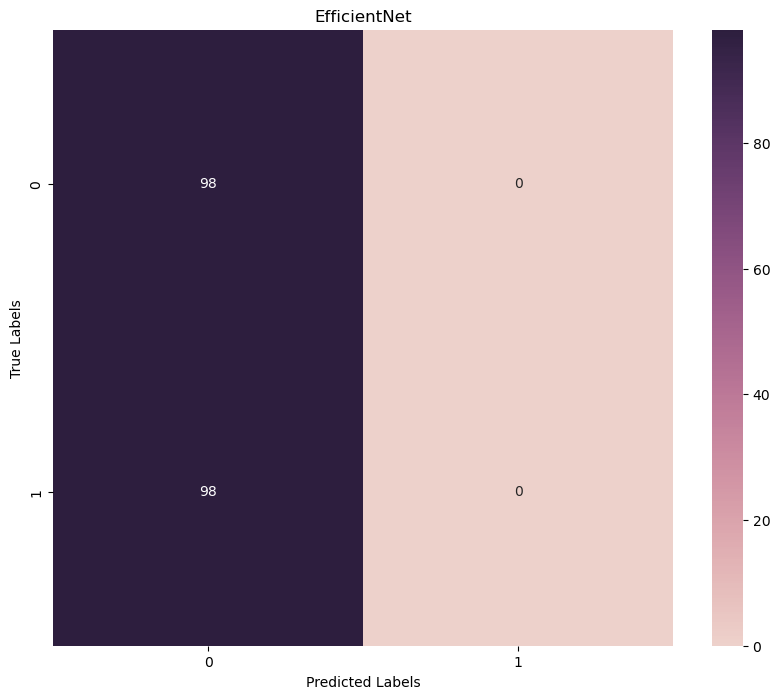

In [24]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('EfficientNet')

plt.show()

In [25]:
report = classification_report(true_labels, predicted_labels)
print(report)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        98
           1       0.00      0.00      0.00        98

    accuracy                           0.50       196
   macro avg       0.25      0.50      0.33       196
weighted avg       0.25      0.50      0.33       196



/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [26]:
f1 = metrics.classification.BinaryF1Score()
f1_score = f1(torch.tensor(predicted_labels), torch.tensor(true_labels))
prec = metrics.classification.BinaryPrecision()
precision = prec(torch.tensor(predicted_labels), torch.tensor(true_labels))
rec = metrics.classification.BinaryRecall()
recall = rec(torch.tensor(predicted_labels), torch.tensor(true_labels))

print(f'F1-Score: {f1_score * 100}, Precision: {precision * 100}, Recall: {recall * 100}')

F1-Score: 0.0, Precision: 0.0, Recall: 0.0


# ResNet18 + Data Augmentation

In [16]:
from torchvision.models import resnet18

In [17]:
class ResNet18(nn.Module):
    def __init__(self, num_classes=4):
        super(ResNet18, self).__init__()
        self.resnet18= resnet18(pretrained=True)
        self.resnet18.fc = nn.Linear(self.resnet18.fc.in_features, num_classes)
        
    def forward(self, x):
        return self.resnet18(x)

In [18]:
net = ResNet18()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = LEARNING_RATE, weight_decay=WEIGHT_DECAY)

train_loss_history = []
train_acc_history = []

for epoch in range(50):
    net.train()
    correct = 0
    total = 0
    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
        
        if i % 1000 == 999:
            print('[%d, %d] loss: %.3f' %
                 (epoch +1, i+1, running_loss / 1000))
            running_loss = 0.0
            
    epoch_loss = running_loss / len(trainLoader)
    epoch_acc = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)
    
    print('=== EPOCH [%d] ===\n    LOSS: %.3f, ACCURACY: %.3f %%' % (epoch+1, epoch_loss, epoch_acc))

print('======\nFINISHED TRAINING\n======')

/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/sagemaker-distribution/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


=== EPOCH [1] ===
    LOSS: 0.749, ACCURACY: 65.289 %
=== EPOCH [2] ===
    LOSS: 0.545, ACCURACY: 73.808 %
=== EPOCH [3] ===
    LOSS: 0.466, ACCURACY: 79.148 %
=== EPOCH [4] ===
    LOSS: 0.444, ACCURACY: 81.373 %
=== EPOCH [5] ===
    LOSS: 0.459, ACCURACY: 81.182 %
=== EPOCH [6] ===
    LOSS: 0.402, ACCURACY: 82.899 %
=== EPOCH [7] ===
    LOSS: 0.343, ACCURACY: 85.887 %
=== EPOCH [8] ===
    LOSS: 0.384, ACCURACY: 84.107 %
=== EPOCH [9] ===
    LOSS: 0.368, ACCURACY: 84.615 %
=== EPOCH [10] ===
    LOSS: 0.322, ACCURACY: 85.315 %
=== EPOCH [11] ===
    LOSS: 0.324, ACCURACY: 87.095 %
=== EPOCH [12] ===
    LOSS: 0.348, ACCURACY: 86.014 %
=== EPOCH [13] ===
    LOSS: 0.276, ACCURACY: 88.620 %
=== EPOCH [14] ===
    LOSS: 0.271, ACCURACY: 88.684 %
=== EPOCH [15] ===
    LOSS: 0.253, ACCURACY: 89.765 %
=== EPOCH [16] ===
    LOSS: 0.277, ACCURACY: 88.366 %
=== EPOCH [17] ===
    LOSS: 0.266, ACCURACY: 89.510 %
=== EPOCH [18] ===
    LOSS: 0.251, ACCURACY: 89.320 %
=== EPOCH [19] ===


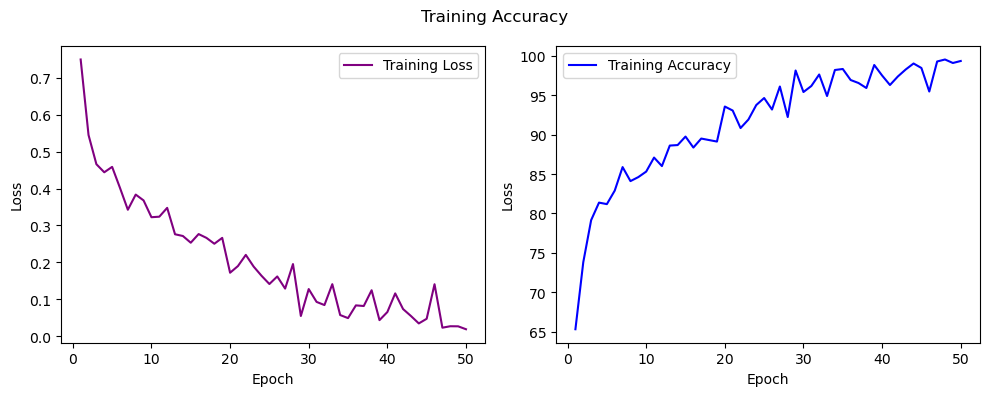

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, color='purple', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc_history) + 1), train_acc_history, color='blue', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('ResNet50_lp.png')
plt.show()

In [20]:
net.eval()

correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in valLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 55 %


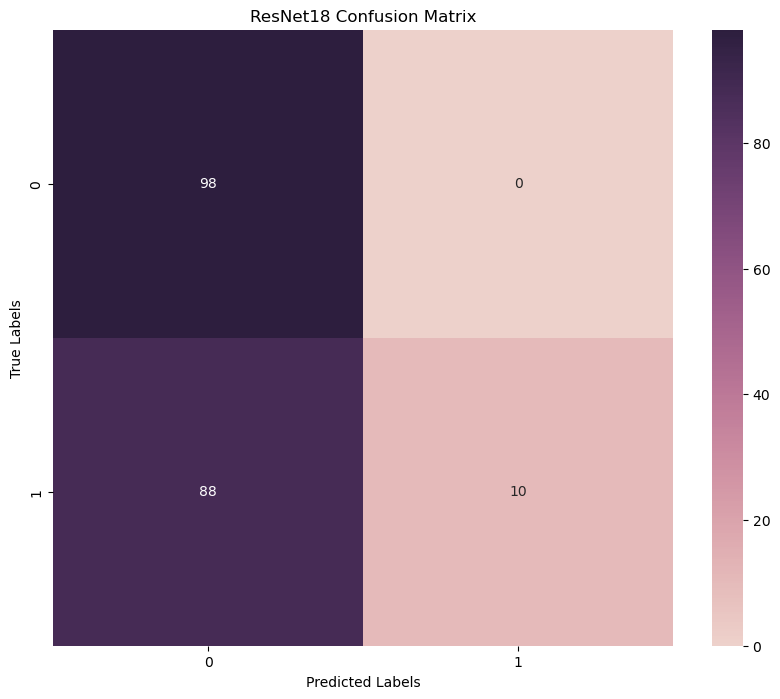

In [23]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ResNet18 Confusion Matrix')
plt.savefig('resnet18confmatrix.png')

plt.show()

In [25]:
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        98
           1       1.00      0.10      0.19        98

    accuracy                           0.55       196
   macro avg       0.76      0.55      0.44       196
weighted avg       0.76      0.55      0.44       196



In [27]:
f1 = metrics.F1Score(task='multiclass', num_classes=4)
f1 = f1(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

prec = metrics.Precision(task='multiclass', average='macro', num_classes=4)
prec = prec(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

recall = metrics.Recall(task='multiclass', average='macro', num_classes=4)
recall = recall(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

print(f'F1 Score: {f1}, Precision: {prec}, Recall: {recall}')

F1 Score: 55.1020393371582, Precision: 76.34408569335938, Recall: 55.1020393371582


# ResNet50 + ImageNet Weights

In [32]:
from torchvision import models
from torchvision.models import resnet50

In [33]:
model = resnet50(weights = models.ResNet50_Weights.DEFAULT)
model.conv1 = nn.Conv2d(3, 64, 2, 3, bias=False)
model.fc = nn.Linear(in_features=2048, out_features=2, bias=True)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/studio-lab-user/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 438MB/s]


In [37]:
epochLossList = []
epochAccList = []

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(20):
    model.train()
    
    epochLoss = 0.0
    epochACC = 0.0
    step = 0
    
    for i, data in enumerate(trainLoader):
        img, label = data
        img, label = img.to(device), label.to(device)
        
        optimizer.zero_grad()
        
        with torch.set_grad_enabled(True):
            model_out = model(img)
            loss = loss_fn(model_out, label)
            _, pred = torch.max(model_out, 1)
            
            loss.backward()
            optimizer.step()
            
            epochACC += torch.sum(pred == label.data)
            epochLoss += loss.item() * len(model_out)
            
        step += 1
        
    data_size = len(trainLoader.dataset)
    epochLoss = epochLoss / data_size
    epochACC = epochACC.double() / data_size * 100
    epochLossList.append(epochLoss)
    epochAccList.append(epochACC)
    print('=== EPOCH [%d] ===\n    LOSS: %.3f, ACCURACY: %.3f %%' % (epoch+1, epoch_loss, epoch_acc))

=== EPOCH [1] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [2] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [3] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [4] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [5] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [6] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [7] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [8] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [9] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [10] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [11] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [12] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [13] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [14] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [15] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [16] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [17] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [18] ===
    LOSS: 0.019, ACCURACY: 99.364 %
=== EPOCH [19] ===


In [43]:
def to_numpy(element):
    if torch.is_tensor(element):
        return element.cpu().numpy()
    else:
        return np.array(element)

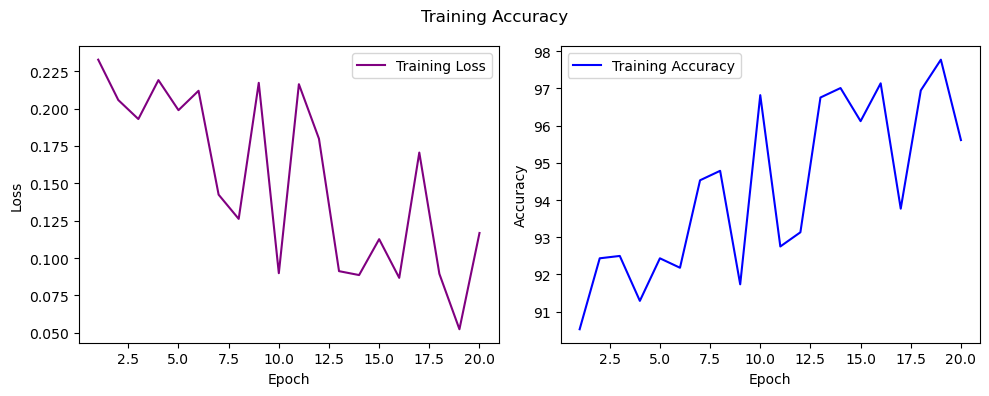

In [44]:
epochLossList = np.array([to_numpy(element) for element in epochLossList])
epochAccList = np.array([to_numpy(element) for element in epochAccList])

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(epochLossList) + 1), epochLossList, color='purple', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.suptitle('Training Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(epochAccList) + 1), epochAccList, color='blue', label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.suptitle('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('ResNet50_lp.png')
plt.show()

In [45]:
model.eval()

correct = 0
total = 0
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in valLoader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())
        
acc = 100 * correct / total

print('Accuracy of the network on the test images: %d %%' % acc)

Accuracy of the network on the test images: 54 %


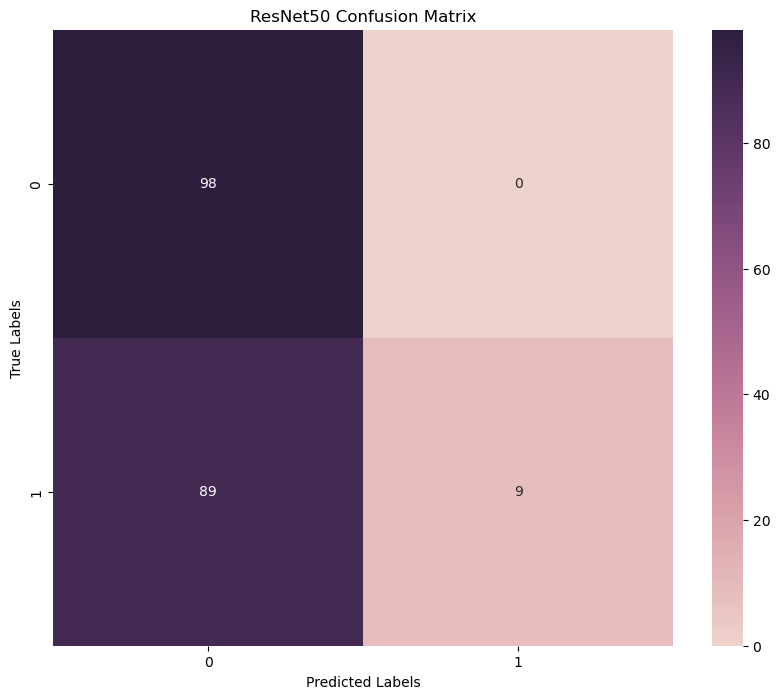

In [46]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_names = [str(i) for i in range(2)]

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('ResNet50 Confusion Matrix')
plt.savefig('resnet50confmatrix.png')

plt.show()

In [47]:
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

           0       0.52      1.00      0.69        98
           1       1.00      0.09      0.17        98

    accuracy                           0.55       196
   macro avg       0.76      0.55      0.43       196
weighted avg       0.76      0.55      0.43       196



In [48]:
f1 = metrics.F1Score(task='multiclass', num_classes=4)
f1 = f1(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

prec = metrics.Precision(task='multiclass', average='macro', num_classes=4)
prec = prec(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

recall = metrics.Recall(task='multiclass', average='macro', num_classes=4)
recall = recall(torch.tensor(predicted_labels), torch.tensor(true_labels)) * 100

print(f'F1 Score: {f1}, Precision: {prec}, Recall: {recall}')

F1 Score: 54.591835021972656, Precision: 76.20320892333984, Recall: 54.591835021972656
